In [ ]:
# importing library as per the usage for the transformation
# this helps in creating the new features from the dataset to get the required details
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# here it involves the required transformation to get the better
from sklearn.preprocessing import (
	OneHotEncoder,
	OrdinalEncoder,
	StandardScaler,
	MinMaxScaler,
	PowerTransformer,
	FunctionTransformer
)


In [ ]:
%pip install feature_engine

# using the featur engine mpackage to perform he feature engineering on the dataset to get the required details
# HELPS TO manage the the imbalance dataset along with crearting the pipelines
from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.encoding import (
	RareLabelEncoder,
	MeanEncoder,
	CountFrequencyEncoder
)
# importing the matplotlib for the vizuallization tools to get the required datas
import matplotlib.pyplot as plt

import warnings

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pd.set_option("display.max_columns", None)
sklearn.set_config(transform_output="pandas")



In [ ]:
path="C:/Users/singh/OneDrive/Desktop/Machine Leanring/Project/train_data.csv"
train=pd.read_csv(path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-24,Kolkata,Banglore,09:50:00,12:30:00,1600,2.0,No Info,15170
1,Indigo,2019-06-21,Banglore,Delhi,21:15:00,00:15:00,180,0.0,No Info,3943
2,Air India,2019-05-15,Delhi,Cochin,18:45:00,19:15:00,1470,2.0,No Info,13307
3,Multiple Carriers,2019-06-15,Delhi,Cochin,18:00:00,01:30:00,450,1.0,No Info,7408
4,Jet Airways,2019-05-12,Kolkata,Banglore,20:25:00,21:05:00,1480,1.0,No Info,12121
...,...,...,...,...,...,...,...,...,...,...
795,Multiple Carriers,2019-03-03,Delhi,Cochin,08:00:00,15:30:00,450,1.0,No Info,17057
796,Indigo,2019-06-21,Mumbai,Hyderabad,09:10:00,10:40:00,90,0.0,No Info,5755
797,Indigo,2019-03-06,Chennai,Kolkata,22:05:00,00:25:00,140,0.0,No Info,5277
798,Multiple Carriers,2019-06-12,Delhi,Cochin,04:55:00,19:00:00,845,1.0,No Info,10678


In [ ]:
print(train.info())
X_train = train.drop(columns="price")
y_train = train.price.copy()
print(X_train.head())
print(y_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          800 non-null    object 
 1   date_of_journey  800 non-null    object 
 2   source           800 non-null    object 
 3   destination      800 non-null    object 
 4   dep_time         800 non-null    object 
 5   arrival_time     800 non-null    object 
 6   duration         800 non-null    int64  
 7   total_stops      800 non-null    float64
 8   additional_info  800 non-null    object 
 9   price            800 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 62.6+ KB
None
             airline date_of_journey    source destination  dep_time  \
0          Air India      2019-05-24   Kolkata    Banglore  09:50:00   
1             Indigo      2019-06-21  Banglore       Delhi  21:15:00   
2          Air India      2019-05-15     Delhi      Cochin 

In [ ]:
X_train.airline
air_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
	("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

air_transformer.fit_transform(X_train.loc[:, ["airline"]])#.airline.value_counts()

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
795,0.0,0.0,0.0,1.0,0.0
796,0.0,1.0,0.0,0.0,0.0
797,0.0,1.0,0.0,0.0,0.0
798,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train.date_of_journey


0      2019-05-24
1      2019-06-21
2      2019-05-15
3      2019-06-15
4      2019-05-12
          ...    
795    2019-03-03
796    2019-06-21
797    2019-03-06
798    2019-06-12
799    2019-05-21
Name: date_of_journey, Length: 800, dtype: object

In [ ]:
feature_to_extract = ["month", "week", "day_of_week", "day_of_year"]

doj_transformer = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=feature_to_extract, yearfirst=True, format="mixed")),
	("scaler", MinMaxScaler())
])

doj_transformer.fit_transform(X_train.loc[:, ["date_of_journey"]])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,0.666667,0.705882,0.666667,0.711864
1,1.000000,0.941176,0.666667,0.949153
2,0.666667,0.647059,0.333333,0.635593
3,1.000000,0.882353,0.833333,0.898305
4,0.666667,0.588235,1.000000,0.610169
...,...,...,...,...
795,0.000000,0.000000,1.000000,0.016949
796,1.000000,0.941176,0.666667,0.949153
797,0.000000,0.058824,0.333333,0.042373
798,1.000000,0.882353,0.333333,0.872881


In [ ]:
X_train.source


0       Kolkata
1      Banglore
2         Delhi
3         Delhi
4       Kolkata
         ...   
795       Delhi
796      Mumbai
797     Chennai
798       Delhi
799     Kolkata
Name: source, Length: 800, dtype: object

In [ ]:
X_train.destination


0       Banglore
1          Delhi
2         Cochin
3         Cochin
4       Banglore
         ...    
795       Cochin
796    Hyderabad
797      Kolkata
798       Cochin
799     Banglore
Name: destination, Length: 800, dtype: object

In [ ]:
location_subset = X_train.loc[:, ["source", "destination"]]
location_subset

,source,destination
0,Kolkata,Banglore
1,Banglore,Delhi
2,Delhi,Cochin
3,Delhi,Cochin
4,Kolkata,Banglore
...,...,...
795,Delhi,Cochin
796,Mumbai,Hyderabad
797,Chennai,Kolkata
798,Delhi,Cochin


In [ ]:
location_pipe1 = Pipeline(steps=[
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
	("encoder", MeanEncoder()),
	("scaler", PowerTransformer())
])

location_pipe1.fit_transform(location_subset, y_train)

,source,destination
0,-0.060693,-0.075773
1,-1.144764,-1.751192
2,1.011077,1.011433
3,1.011077,1.011433
4,-0.060693,-0.075773
...,...,...
795,1.011077,1.011433
796,-1.717174,-1.074298
797,-1.717174,-1.074298
798,1.011077,1.011433


In [ ]:
np.union1d(
	X_train.source.unique(),
	X_train.destination.unique()
)

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai', 'New Delhi'], dtype=object)

In [ ]:
def is_north(X):
	columns = X.columns.to_list()
	north_cities = ["Delhi", "Kolkata", "Mumbai", "New Delhi"]
	return (
		X
		.assign(**{
			f"{col}_is_north": X.loc[:, col].isin(north_cities).astype(int)
			for col in columns
		})
		.drop(columns=columns)
	)


FunctionTransformer(func=is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
795,1,0
796,1,0
797,0,1
798,1,0


In [ ]:

location_transformer = FeatureUnion(transformer_list=[
	("part1", location_pipe1),
	("part2", FunctionTransformer(func=is_north))
])

location_transformer.fit_transform(location_subset, y_train)

,source,destination,source_is_north,destination_is_north
0,-0.060693,-0.075773,1,0
1,-1.144764,-1.751192,0,1
2,1.011077,1.011433,1,0
3,1.011077,1.011433,1,0
4,-0.060693,-0.075773,1,0
...,...,...,...,...
795,1.011077,1.011433,1,0
796,-1.717174,-1.074298,1,0
797,-1.717174,-1.074298,0,1
798,1.011077,1.011433,1,0


In [ ]:
print(X_train.dep_time)
print(X_train.arrival_time)
time_subset = X_train.loc[:, ["dep_time", "arrival_time"]]
time_subset


0      09:50:00
1      21:15:00
2      18:45:00
3      18:00:00
4      20:25:00
         ...   
795    08:00:00
796    09:10:00
797    22:05:00
798    04:55:00
799    10:00:00
Name: dep_time, Length: 800, dtype: object
0      12:30:00
1      00:15:00
2      19:15:00
3      01:30:00
4      21:05:00
         ...   
795    15:30:00
796    10:40:00
797    00:25:00
798    19:00:00
799    23:15:00
Name: arrival_time, Length: 800, dtype: object


,dep_time,arrival_time
0,09:50:00,12:30:00
1,21:15:00,00:15:00
2,18:45:00,19:15:00
3,18:00:00,01:30:00
4,20:25:00,21:05:00
...,...,...
795,08:00:00,15:30:00
796,09:10:00,10:40:00
797,22:05:00,00:25:00
798,04:55:00,19:00:00


In [ ]:
time_pipe1 = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=["hour", "minute"])),
	("scaler", MinMaxScaler())
])

time_pipe1.fit_transform(time_subset)

c:\Users\singh\anaconda3\envs\efficientPS_env\lib\site-packages\feature_engine\datetime\datetime.py:347: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\singh\anaconda3\envs\efficientPS_env\lib\site-packages\feature_engine\datetime\datetime.py:347: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.391304,0.909091,0.521739,0.545455
1,0.913043,0.272727,0.000000,0.272727
2,0.782609,0.818182,0.826087,0.272727
3,0.782609,0.000000,0.043478,0.545455
4,0.869565,0.454545,0.913043,0.090909
...,...,...,...,...
795,0.347826,0.000000,0.652174,0.545455
796,0.391304,0.181818,0.434783,0.727273
797,0.956522,0.090909,0.000000,0.454545
798,0.173913,1.000000,0.826087,0.000000


In [ ]:
def part_of_day(X, morning=4, noon=12, eve=16, night=20):
	columns = X.columns.to_list()
	X_temp = X.assign(**{
		col: pd.to_datetime(X.loc[:, col]).dt.hour
		for col in columns
	})

	return (
		X_temp
		.assign(**{
			f"{col}_part_of_day": np.select(
				[X_temp.loc[:, col].between(morning, noon, inclusive="left"),
				 X_temp.loc[:, col].between(noon, eve, inclusive="left"),
				 X_temp.loc[:, col].between(eve, night, inclusive="left")],
				["morning", "afternoon", "evening"],
				default="night"
			)
			for col in columns
		})
		.drop(columns=columns)
	)

FunctionTransformer(func=part_of_day).fit_transform(time_subset)

C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour
C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour


,dep_time_part_of_day,arrival_time_part_of_day
0,morning,afternoon
1,night,night
2,evening,evening
3,evening,night
4,night,night
...,...,...
795,morning,afternoon
796,morning,morning
797,night,night
798,morning,evening


In [ ]:
time_pipe2 = Pipeline(steps=[
	("part", FunctionTransformer(func=part_of_day)),
	("encoder", CountFrequencyEncoder()),
	("scaler", MinMaxScaler())
])

time_pipe2.fit_transform(time_subset)

C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour
C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour


,dep_time_part_of_day,arrival_time_part_of_day
0,1.000000,0.000000
1,0.152985,1.000000
2,0.220149,0.755906
3,0.220149,1.000000
4,0.152985,1.000000
...,...,...
795,1.000000,0.000000
796,1.000000,0.921260
797,0.152985,1.000000
798,1.000000,0.755906


In [ ]:
time_transformer = FeatureUnion(transformer_list=[
	("part1", time_pipe1),
	("part2", time_pipe2)
])

time_transformer.fit_transform(time_subset)

c:\Users\singh\anaconda3\envs\efficientPS_env\lib\site-packages\feature_engine\datetime\datetime.py:347: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\singh\anaconda3\envs\efficientPS_env\lib\site-packages\feature_engine\datetime\datetime.py:347: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour
C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not 

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.391304,0.909091,0.521739,0.545455,1.000000,0.000000
1,0.913043,0.272727,0.000000,0.272727,0.152985,1.000000
2,0.782609,0.818182,0.826087,0.272727,0.220149,0.755906
3,0.782609,0.000000,0.043478,0.545455,0.220149,1.000000
4,0.869565,0.454545,0.913043,0.090909,0.152985,1.000000
...,...,...,...,...,...,...
795,0.347826,0.000000,0.652174,0.545455,1.000000,0.000000
796,0.391304,0.181818,0.434783,0.727273,1.000000,0.921260
797,0.956522,0.090909,0.000000,0.454545,0.152985,1.000000
798,0.173913,1.000000,0.826087,0.000000,1.000000,0.755906


In [ ]:
print(X_train.duration)

0      1600
1       180
2      1470
3       450
4      1480
       ... 
795     450
796      90
797     140
798     845
799     795
Name: duration, Length: 800, dtype: int64


In [ ]:
print((
	X_train
	.duration
	.quantile([0.25, 0.5, 0.75])
	.values
	.reshape(-1, 1)
	# .shape
))

[[175.  ]
 [550.  ]
 [936.25]]


In [ ]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
	def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
		self.variables = variables
		self.percentiles = percentiles
		self.gamma = gamma


	def fit(self, X, y=None):
		if not self.variables:
			self.variables = X.select_dtypes(include="number").columns.to_list()

		self.reference_values_ = {
			col: (
				X
				.loc[:, col]
				.quantile(self.percentiles)
				.values
				.reshape(-1, 1)
			)
			for col in self.variables
		}

		return self


	def transform(self, X):
		objects = []
		for col in self.variables:
			columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
			obj = pd.DataFrame(
				data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
				columns=columns
			)
			objects.append(obj)
		return pd.concat(objects, axis=1)

In [ ]:
RBFPercentileSimilarity(percentiles=[0.4, 0.8]).fit_transform(X_train)


,duration_rbf_40,duration_rbf_80,total_stops_rbf_40,total_stops_rbf_80
0,0.000000e+00,0.0,0.904837,0.904837
1,0.000000e+00,0.0,0.904837,0.904837
2,0.000000e+00,0.0,0.904837,0.904837
3,3.240271e-184,0.0,1.000000,1.000000
4,0.000000e+00,0.0,1.000000,1.000000
...,...,...,...,...
795,3.240271e-184,0.0,1.000000,1.000000
796,0.000000e+00,0.0,0.904837,0.904837
797,0.000000e+00,0.0,0.904837,0.904837
798,0.000000e+00,0.0,1.000000,1.000000


In [ ]:
def duration_category(X, short=180, med=400):
	return (
		X
		.assign(duration_cat=np.select([X.duration.lt(short),
									    X.duration.between(short, med, inclusive="left")],
									   ["short", "medium"],
									   default="long"))
		.drop(columns="duration")
	)


In [ ]:
def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X.duration.ge(value).astype(int)
		})
		.drop(columns="duration")
	)

In [ ]:
duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

duration_transformer.fit_transform(X_train.loc[:, ["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,-0.370244,-0.113769,-0.102769,2.0,1,1.888583
1,2.517624,-0.113769,-0.102769,1.0,0,-0.934723
2,-0.370244,-0.113769,-0.102769,2.0,1,1.630112
3,-0.370244,-0.113769,-0.102769,2.0,0,-0.397897
4,-0.370244,-0.113769,-0.102769,2.0,1,1.649994
...,...,...,...,...,...,...
795,-0.370244,-0.113769,-0.102769,2.0,0,-0.397897
796,-0.370244,-0.113769,-0.102769,0.0,0,-1.113665
797,-0.370244,-0.113769,-0.102769,0.0,0,-1.014253
798,-0.370244,-0.113769,-0.102769,2.0,0,0.387459


In [ ]:
print(X_train.total_stops)
def is_direct(X):
	return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))


total_stops_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("", FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:, ["total_stops"]])

0      2.0
1      0.0
2      2.0
3      1.0
4      1.0
      ... 
795    1.0
796    0.0
797    0.0
798    1.0
799    1.0
Name: total_stops, Length: 800, dtype: float64


,total_stops,is_direct_flight
0,2.0,0
1,0.0,1
2,2.0,0
3,1.0,0
4,1.0,0
...,...,...
795,1.0,0
796,0.0,1
797,0.0,1
798,1.0,0


In [ ]:
print(X_train.additional_info
)

0      No Info
1      No Info
2      No Info
3      No Info
4      No Info
        ...   
795    No Info
796    No Info
797    No Info
798    No Info
799    No Info
Name: additional_info, Length: 800, dtype: object


In [ ]:
info_pipe1 = Pipeline(steps=[
	("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
	("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
795,0.0,1.0,0.0
796,0.0,1.0,0.0
797,0.0,1.0,0.0
798,0.0,1.0,0.0


In [ ]:
def have_info(X):
	return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))


In [ ]:
info_union = FeatureUnion(transformer_list=[
	("part1", info_pipe1),
	("part2", FunctionTransformer(func=have_info))
])

In [ ]:
info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_transformer.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other,additional_info
0,0.0,1.0,0.0,0
1,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0
4,0.0,1.0,0.0,0
...,...,...,...,...
795,0.0,1.0,0.0,0
796,0.0,1.0,0.0,0
797,0.0,1.0,0.0,0
798,0.0,1.0,0.0,0


In [ ]:
column_transformer = ColumnTransformer(transformers=[
	("air", air_transformer, ["airline"]),
	("doj", doj_transformer, ["date_of_journey"]),
	("location", location_transformer, ["source", 'destination']),
	("time", time_transformer, ["dep_time", "arrival_time"]),
	("dur", duration_transformer, ["duration"]),
	("stops", total_stops_transformer, ["total_stops"]),
	("info", info_transformer, ["additional_info"])
], remainder="passthrough")
column_transformer.fit_transform(X_train, y_train)



c:\Users\singh\anaconda3\envs\efficientPS_env\lib\site-packages\feature_engine\datetime\datetime.py:347: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\singh\anaconda3\envs\efficientPS_env\lib\site-packages\feature_engine\datetime\datetime.py:347: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour
C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not 

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_rbf_75,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info
0,1.0,0.0,0.0,0.0,0.0,0.666667,0.705882,0.666667,0.711864,-0.060693,-0.075773,1,0,0.391304,0.909091,0.521739,0.545455,1.000000,0.000000,-0.370244,-0.113769,-0.102769,2.0,1,1.888583,2.0,0,0.0,1.0,0.0,0
1,0.0,1.0,0.0,0.0,0.0,1.000000,0.941176,0.666667,0.949153,-1.144764,-1.751192,0,1,0.913043,0.272727,0.000000,0.272727,0.152985,1.000000,2.517624,-0.113769,-0.102769,1.0,0,-0.934723,0.0,1,0.0,1.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.666667,0.647059,0.333333,0.635593,1.011077,1.011433,1,0,0.782609,0.818182,0.826087,0.272727,0.220149,0.755906,-0.370244,-0.113769,-0.102769,2.0,1,1.630112,2.0,0,0.0,1.0,0.0,0
3,0.0,0.0,0.0,1.0,0.0,1.000000,0.882353,0.833333,0.898305,1.011077,1.011433,1,0,0.782609,0.000000,0.043478,0.545455,0.220149,1.000000,-0.370244,-0.113769,-0.102769,2.0,0,-0.397897,1.0,0,0.0,1.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.666667,0.588235,1.000000,0.610169,-0.060693,-0.075773,1,0,0.869565,0.454545,0.913043,0.090909,0.152985,1.000000,-0.370244,-0.113769,-0.102769,2.0,1,1.649994,1.0,0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.016949,1.011077,1.011433,1,0,0.347826,0.000000,0.652174,0.545455,1.000000,0.000000,-0.370244,-0.113769,-0.102769,2.0,0,-0.397897,1.0,0,0.0,1.0,0.0,0
796,0.0,1.0,0.0,0.0,0.0,1.000000,0.941176,0.666667,0.949153,-1.717174,-1.074298,1,0,0.391304,0.181818,0.434783,0.727273,1.000000,0.921260,-0.370244,-0.113769,-0.102769,0.0,0,-1.113665,0.0,1,0.0,1.0,0.0,0
797,0.0,1.0,0.0,0.0,0.0,0.000000,0.058824,0.333333,0.042373,-1.717174,-1.074298,0,1,0.956522,0.090909,0.000000,0.454545,0.152985,1.000000,-0.370244,-0.113769,-0.102769,0.0,0,-1.014253,0.0,1,0.0,1.0,0.0,0
798,0.0,0.0,0.0,1.0,0.0,1.000000,0.882353,0.333333,0.872881,1.011077,1.011433,1,0,0.173913,1.000000,0.826087,0.000000,1.000000,0.755906,-0.370244,-0.113769,-0.102769,2.0,0,0.387459,1.0,0,0.0,1.0,0.0,0


In [ ]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
	estimator=estimator,
	scoring="r2",
	threshold=0.1
)

In [ ]:
preprocessor = Pipeline(steps=[
	("ct", column_transformer),
	("selector", selector)
])

preprocessor.fit_transform(X_train, y_train)

c:\Users\singh\anaconda3\envs\efficientPS_env\lib\site-packages\feature_engine\datetime\datetime.py:347: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\singh\anaconda3\envs\efficientPS_env\lib\site-packages\feature_engine\datetime\datetime.py:347: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour
C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not 

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Other,location__source,location__destination,dur__duration_cat,dur__duration,stops__total_stops,stops__is_direct_flight
0,0.0,0.0,0.0,-0.060693,-0.075773,2.0,1.888583,2.0,0
1,1.0,0.0,0.0,-1.144764,-1.751192,1.0,-0.934723,0.0,1
2,0.0,0.0,0.0,1.011077,1.011433,2.0,1.630112,2.0,0
3,0.0,0.0,0.0,1.011077,1.011433,2.0,-0.397897,1.0,0
4,0.0,1.0,0.0,-0.060693,-0.075773,2.0,1.649994,1.0,0
...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,1.011077,1.011433,2.0,-0.397897,1.0,0
796,1.0,0.0,0.0,-1.717174,-1.074298,0.0,-1.113665,0.0,1
797,1.0,0.0,0.0,-1.717174,-1.074298,0.0,-1.014253,0.0,1
798,0.0,0.0,0.0,1.011077,1.011433,2.0,0.387459,1.0,0


In [ ]:

feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': -0.014061468112943546,
 'air__airline_Indigo': 0.14049985774352272,
 'air__airline_Jet Airways': 0.1830203420142664,
 'air__airline_Multiple Carriers': 0.008138170961371594,
 'air__airline_Other': 0.10461285038435501,
 'doj__date_of_journey_month': 0.0167301915058435,
 'doj__date_of_journey_week': 0.0791530195514752,
 'doj__date_of_journey_day_of_week': -0.010819210826816436,
 'doj__date_of_journey_day_of_year': 0.08419438284798553,
 'location__source': 0.13871473934654563,
 'location__destination': 0.14196699836825166,
 'location__source_is_north': 0.06025471767164222,
 'location__destination_is_north': 0.06025471767164222,
 'time__dep_time_hour': 0.002882757981488034,
 'time__dep_time_minute': 0.033223199364436,
 'time__arrival_time_hour': 0.09765332651373726,
 'time__arrival_time_minute': 0.00808828951876687,
 'time__dep_time_part_of_day': -0.019677220400990736,
 'time__arrival_time_part_of_day': 0.02226885110230466,
 'dur__duration_rbf_25': 0.084404534295

In [ ]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'info__additional_info_No Info': -0.02425338950745215,
 'info__additional_info': -0.02425338950745215,
 'time__dep_time_part_of_day': -0.019677220400990736,
 'dur__duration_rbf_50': -0.018984853961612574,
 'info__additional_info_In-flight meal not included': -0.014970695127944541,
 'air__airline_Air India': -0.014061468112943546,
 'doj__date_of_journey_day_of_week': -0.010819210826816436,
 'dur__duration_rbf_75': -0.007485684328295365,
 'time__dep_time_hour': 0.002882757981488034,
 'info__additional_info_Other': 0.003630315971113222,
 'time__arrival_time_minute': 0.00808828951876687,
 'air__airline_Multiple Carriers': 0.008138170961371594,
 'doj__date_of_journey_month': 0.0167301915058435,
 'time__arrival_time_part_of_day': 0.02226885110230466,
 'time__dep_time_minute': 0.033223199364436,
 'location__source_is_north': 0.06025471767164222,
 'location__destination_is_north': 0.06025471767164222,
 'doj__date_of_journey_week': 0.0791530195514752,
 'doj__date_of_journey_day_of_year': 0.084

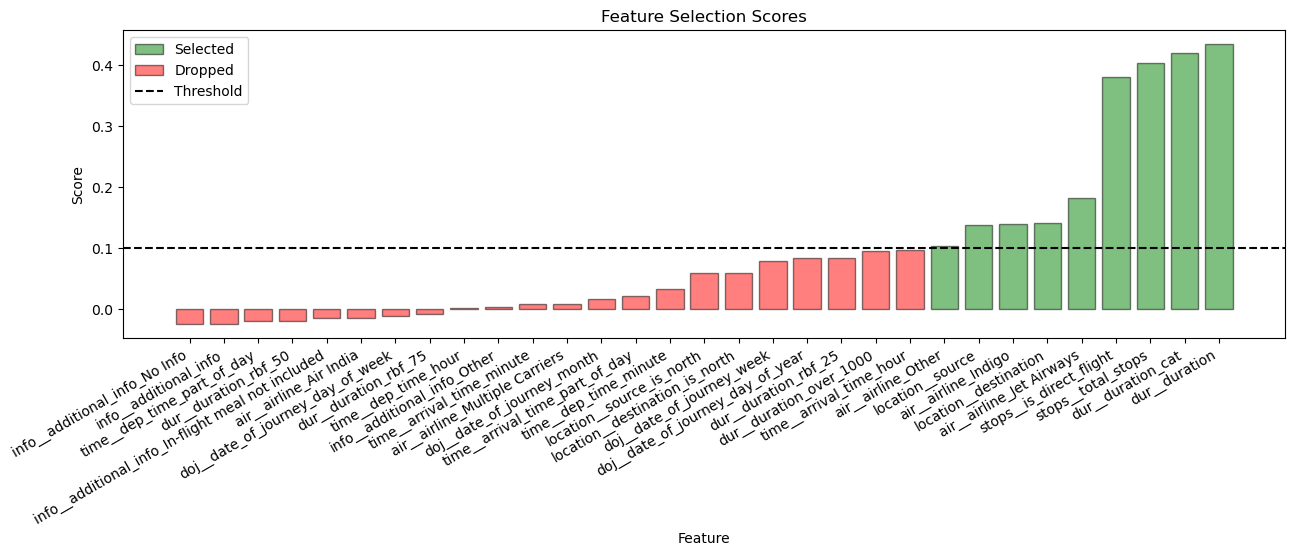

In [ ]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4))

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
	params = dict(
		x=i,
		height=score,
		edgecolor="black",
		alpha=0.5
	)

	if score < THRESHOLD:
		bar = ax.bar(
			color="red",
			**params
		)
		if not dropped_bar:
			dropped_bar = bar[0]
	else:
		bar = ax.bar(
			color="green",
			**params
		)
		if not selected_bar:
			selected_bar = bar[0]

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
	labels=list(sorted_feat_imp.keys()),
	rotation=30,
	ha="right"
)

ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)

ax.legend(
	handles=[selected_bar, dropped_bar, thresh_line],
	labels=["Selected", "Dropped", "Threshold"],
	loc="upper left"
)

plt.show()


In [ ]:
preprocessor.fit(
    train.drop(columns="price"),
    train.price.copy()
)

c:\Users\singh\anaconda3\envs\efficientPS_env\lib\site-packages\feature_engine\datetime\datetime.py:347: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\singh\anaconda3\envs\efficientPS_env\lib\site-packages\feature_engine\datetime\datetime.py:347: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour
C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not 

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('air',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('grouper',
                                                                   RareLabelEncoder(n_categories=2,
                                                                                    replace_with='Other',
                                                                                    tol=0.1)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline']),
                                                 ('doj',
                                                  Pipeline(steps=[('dt',
                                                                   Datetime...
                                                                                                                                     replace_with='Other',
                                                                                                                                     tol=0.1)),
                                                                                                                   ('encoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse_output=False))])),
                                                                                                  ('part2',
                                                                                                   FunctionTransformer(func=<function have_info at 0x0000022C88F19820>))]))]),
                                                  ['additional_info'])])),
                ('selector',
                 SelectBySingleFeaturePerformance(estimator=RandomForestRegressor(max_depth=3,
                                                                                  n_estimators=10,
                                                                                  random_state=42),
                                                  scoring='r2',
                                                  threshold=0.1))])

In [ ]:
preprocessor.transform(train.drop(columns="price"))


c:\Users\singh\anaconda3\envs\efficientPS_env\lib\site-packages\feature_engine\datetime\datetime.py:347: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\singh\anaconda3\envs\efficientPS_env\lib\site-packages\feature_engine\datetime\datetime.py:347: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(X.loc[:, col]).dt.hour
C:\Users\singh\AppData\Local\Temp\ipykernel_83428\2839566320.py:4: UserWarning: Could not 

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Other,location__source,location__destination,dur__duration_cat,dur__duration,stops__total_stops,stops__is_direct_flight
0,0.0,0.0,0.0,-0.060693,-0.075773,2.0,1.888583,2.0,0
1,1.0,0.0,0.0,-1.144764,-1.751192,1.0,-0.934723,0.0,1
2,0.0,0.0,0.0,1.011077,1.011433,2.0,1.630112,2.0,0
3,0.0,0.0,0.0,1.011077,1.011433,2.0,-0.397897,1.0,0
4,0.0,1.0,0.0,-0.060693,-0.075773,2.0,1.649994,1.0,0
...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,1.011077,1.011433,2.0,-0.397897,1.0,0
796,1.0,0.0,0.0,-1.717174,-1.074298,0.0,-1.113665,0.0,1
797,1.0,0.0,0.0,-1.717174,-1.074298,0.0,-1.014253,0.0,1
798,0.0,0.0,0.0,1.011077,1.011433,2.0,0.387459,1.0,0
